# Transicition_Assignment_2

## Abstract

Housing price always been a popular item that people wants to predict. Since it’s so important, then it is critical for us to find out what will impact the price. Therefore, in this assignment, I'm using the dataset "Predciting Price Transaction" from https://www.kaggle.com/econdata/predciting-price-transaction#Schools.csv to find out the factors that affecting transaction price. And after the predicting, I found out the exclusive_use_area is most related to the transaction price. 

##  Import Dataset

In [1]:
import pandas as pd

df=pd.read_csv("trainPrice.csv", decimal = ',')

## Select the needed columns

Select the data needed, since the dataset is too huge, and include useless data

In [2]:
## Show all the data we import in DataFrame
df = df.sample(frac=0.003).reset_index(drop=True)

col_n = ['transaction_real_price', 'city', 'exclusive_use_area','floor','total_parking_capacity_in_site',
         'total_household_count_in_sites','apartment_building_count_in_sites','heat_type','heat_fuel',
         'front_door_structure','supply_area','total_household_count_of_area_type',
        'room_count','bathroom_count']

dfn = pd.DataFrame(df,columns = col_n)

dfn

,transaction_real_price,city,exclusive_use_area,floor,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,heat_type,heat_fuel,front_door_structure,supply_area,total_household_count_of_area_type,room_count,bathroom_count
0,724000000,1,84.55,9,500.0,448,5,central,gas,stairway,105.26,140,3.0,1.0
1,390000000,1,82.49,9,131.0,127,1,individual,gas,stairway,110.63,95,3.0,2.0
2,341000000,1,84.87,2,2990.0,2182,22,individual,gas,stairway,107.62,981,3.0,2.0
3,68000000,0,40.66,1,1000.0,812,18,individual,gas,stairway,46.28,576,1.0,1.0
4,83000000,0,32.58,4,217.0,358,1,individual,gas,stairway,46.28,48,1.0,1.0
5,270000000,0,119.06,9,350.0,450,2,individual,gas,stairway,140.44,18,4.0,2.0
6,95000000,0,59.79,8,560.0,549,6,individual,gas,stairway,79.58,76,2.0,1.0
7,201500000,0,56.345,8,952.0,896,10,district,cogeneration,stairway,75.28,402,3.0,1.0
8,313000000,1,84.96,2,1459.0,1371,13,individual,gas,stairway,110.12,19,3.0,2.0
9,480000000,1,84.93,12,600.0,572,8,central,gas,stairway,103.8,252,3.0,1.0


## Output the selected data

In [3]:
dfn.to_csv("new.csv",sep=",",index=False,header=True)

## Load libraries

In [1]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl

import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

## Load the selected dataset

In [2]:
df=pd.read_csv("new.csv", decimal = ',')
df

,transaction_real_price,city,exclusive_use_area,floor,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,heat_type,heat_fuel,front_door_structure,supply_area,total_household_count_of_area_type,room_count,bathroom_count
0,724000000,1,84.55,9,500.0,448,5,central,gas,stairway,105.26,140,3.0,1.0
1,390000000,1,82.49,9,131.0,127,1,individual,gas,stairway,110.63,95,3.0,2.0
2,341000000,1,84.87,2,2990.0,2182,22,individual,gas,stairway,107.62,981,3.0,2.0
3,68000000,0,40.66,1,1000.0,812,18,individual,gas,stairway,46.28,576,1.0,1.0
4,83000000,0,32.58,4,217.0,358,1,individual,gas,stairway,46.28,48,1.0,1.0
5,270000000,0,119.06,9,350.0,450,2,individual,gas,stairway,140.44,18,4.0,2.0
6,95000000,0,59.79,8,560.0,549,6,individual,gas,stairway,79.58,76,2.0,1.0
7,201500000,0,56.345,8,952.0,896,10,district,cogeneration,stairway,75.28,402,3.0,1.0
8,313000000,1,84.96,2,1459.0,1371,13,individual,gas,stairway,110.12,19,3.0,2.0
9,480000000,1,84.93,12,600.0,572,8,central,gas,stairway,103.8,252,3.0,1.0


## Table Overview

In [3]:
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
df.describe()

,transaction_real_price,city,floor,total_household_count_in_sites,apartment_building_count_in_sites,total_household_count_of_area_type
count,4.804000e+03,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000
mean,4.032379e+08,0.620316,10.204413,1191.667361,12.878851,297.304954
std,3.090496e+08,0.485359,7.464389,1135.115336,14.103315,334.965719
min,3.500000e+07,0.000000,1.000000,100.000000,1.000000,0.000000
25%,2.000000e+08,0.000000,4.000000,430.000000,4.000000,90.000000
50%,3.300000e+08,1.000000,9.000000,811.000000,9.000000,194.000000
75%,5.000000e+08,1.000000,14.000000,1598.000000,15.000000,396.000000
max,3.500000e+09,1.000000,59.000000,6864.000000,124.000000,2960.000000


## Check missing values in the dataset

In [4]:
df = df.replace('-', None)

In [5]:
# Caculuate the percentage of missing data 
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
total_parking_capacity_in_site,266,5.54
front_door_structure,38,0.79
heat_fuel,30,0.62
heat_type,10,0.21
bathroom_count,2,0.04
room_count,2,0.04


## Processing the missing data

Delete all the missing column, since the percentage of missing data isn't too big

In [6]:
df = df.dropna(axis=0, how='any')
df

,transaction_real_price,city,exclusive_use_area,floor,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,heat_type,heat_fuel,front_door_structure,supply_area,total_household_count_of_area_type,room_count,bathroom_count
0,724000000,1,84.55,9,500.0,448,5,central,gas,stairway,105.26,140,3.0,1.0
1,390000000,1,82.49,9,131.0,127,1,individual,gas,stairway,110.63,95,3.0,2.0
2,341000000,1,84.87,2,2990.0,2182,22,individual,gas,stairway,107.62,981,3.0,2.0
3,68000000,0,40.66,1,1000.0,812,18,individual,gas,stairway,46.28,576,1.0,1.0
4,83000000,0,32.58,4,217.0,358,1,individual,gas,stairway,46.28,48,1.0,1.0
5,270000000,0,119.06,9,350.0,450,2,individual,gas,stairway,140.44,18,4.0,2.0
6,95000000,0,59.79,8,560.0,549,6,individual,gas,stairway,79.58,76,2.0,1.0
7,201500000,0,56.345,8,952.0,896,10,district,cogeneration,stairway,75.28,402,3.0,1.0
8,313000000,1,84.96,2,1459.0,1371,13,individual,gas,stairway,110.12,19,3.0,2.0
9,480000000,1,84.93,12,600.0,572,8,central,gas,stairway,103.8,252,3.0,1.0


In [7]:
df.describe()

,transaction_real_price,city,floor,total_household_count_in_sites,apartment_building_count_in_sites,total_household_count_of_area_type
count,4.470000e+03,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000
mean,4.088925e+08,0.625727,10.304251,1219.045190,13.194855,304.086130
std,3.096397e+08,0.483989,7.431800,1157.112704,14.453646,342.008425
min,3.500000e+07,0.000000,1.000000,100.000000,1.000000,0.000000
25%,2.050000e+08,0.000000,5.000000,437.000000,4.000000,90.000000
50%,3.350000e+08,1.000000,9.000000,830.000000,9.000000,197.000000
75%,5.090000e+08,1.000000,14.000000,1613.000000,16.000000,406.500000
max,3.500000e+09,1.000000,59.000000,6864.000000,124.000000,2960.000000


In [8]:
# Checking for null values
df.isnull().sum().sum()

0

## Binary Categorical Variable

In [9]:
pd.get_dummies(df['heat_fuel'])

,cogeneration,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,0
8,0,1
9,0,1


In [10]:
onehot_encoding_fuel = pd.get_dummies(df['heat_fuel'], prefix = 'heat_fuel')

In [11]:
df = df.drop('heat_fuel', 1)

In [12]:
## Combine the dummy variable with dataset
df = pd.concat([df, onehot_encoding_fuel], axis=1)
df

,transaction_real_price,city,exclusive_use_area,floor,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,heat_type,front_door_structure,supply_area,total_household_count_of_area_type,room_count,bathroom_count,heat_fuel_cogeneration,heat_fuel_gas
0,724000000,1,84.55,9,500.0,448,5,central,stairway,105.26,140,3.0,1.0,0,1
1,390000000,1,82.49,9,131.0,127,1,individual,stairway,110.63,95,3.0,2.0,0,1
2,341000000,1,84.87,2,2990.0,2182,22,individual,stairway,107.62,981,3.0,2.0,0,1
3,68000000,0,40.66,1,1000.0,812,18,individual,stairway,46.28,576,1.0,1.0,0,1
4,83000000,0,32.58,4,217.0,358,1,individual,stairway,46.28,48,1.0,1.0,0,1
5,270000000,0,119.06,9,350.0,450,2,individual,stairway,140.44,18,4.0,2.0,0,1
6,95000000,0,59.79,8,560.0,549,6,individual,stairway,79.58,76,2.0,1.0,0,1
7,201500000,0,56.345,8,952.0,896,10,district,stairway,75.28,402,3.0,1.0,1,0
8,313000000,1,84.96,2,1459.0,1371,13,individual,stairway,110.12,19,3.0,2.0,0,1
9,480000000,1,84.93,12,600.0,572,8,central,stairway,103.8,252,3.0,1.0,0,1


## Multi-class Categorical Variable

In [13]:
pd.get_dummies(df['heat_type'])

,central,district,individual
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,1,0
8,0,0,1
9,1,0,0


In [14]:
onehot_encoding_type = pd.get_dummies(df['heat_type'], prefix = 'heat_type')

In [15]:
df = df.drop('heat_type', 1)

In [16]:
## Combine the dummy variable with dataset
df = pd.concat([df, onehot_encoding_type], axis=1)
df

,transaction_real_price,city,exclusive_use_area,floor,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,front_door_structure,supply_area,total_household_count_of_area_type,room_count,bathroom_count,heat_fuel_cogeneration,heat_fuel_gas,heat_type_central,heat_type_district,heat_type_individual
0,724000000,1,84.55,9,500.0,448,5,stairway,105.26,140,3.0,1.0,0,1,1,0,0
1,390000000,1,82.49,9,131.0,127,1,stairway,110.63,95,3.0,2.0,0,1,0,0,1
2,341000000,1,84.87,2,2990.0,2182,22,stairway,107.62,981,3.0,2.0,0,1,0,0,1
3,68000000,0,40.66,1,1000.0,812,18,stairway,46.28,576,1.0,1.0,0,1,0,0,1
4,83000000,0,32.58,4,217.0,358,1,stairway,46.28,48,1.0,1.0,0,1,0,0,1
5,270000000,0,119.06,9,350.0,450,2,stairway,140.44,18,4.0,2.0,0,1,0,0,1
6,95000000,0,59.79,8,560.0,549,6,stairway,79.58,76,2.0,1.0,0,1,0,0,1
7,201500000,0,56.345,8,952.0,896,10,stairway,75.28,402,3.0,1.0,1,0,0,1,0
8,313000000,1,84.96,2,1459.0,1371,13,stairway,110.12,19,3.0,2.0,0,1,0,0,1
9,480000000,1,84.93,12,600.0,572,8,stairway,103.8,252,3.0,1.0,0,1,1,0,0


In [17]:
df.corr()

,transaction_real_price,city,floor,total_household_count_in_sites,apartment_building_count_in_sites,total_household_count_of_area_type,heat_fuel_cogeneration,heat_fuel_gas,heat_type_central,heat_type_district,heat_type_individual
transaction_real_price,1.000000,0.408925,0.135534,0.233726,0.290391,-0.039080,0.318203,-0.318203,-0.006569,0.320061,-0.290464
city,0.408925,1.000000,-0.158946,0.074425,0.136329,0.006281,0.249519,-0.249519,0.111619,0.249096,-0.293297
floor,0.135534,-0.158946,1.000000,0.109041,-0.006604,0.011808,-0.062385,0.062385,-0.038222,-0.069243,0.085673
total_household_count_in_sites,0.233726,0.074425,0.109041,1.000000,0.870263,0.489410,0.223740,-0.223740,0.077586,0.223036,-0.249736
apartment_building_count_in_sites,0.290391,0.136329,-0.006604,0.870263,1.000000,0.385173,0.231312,-0.231312,0.004202,0.235759,-0.219165
total_household_count_of_area_type,-0.039080,0.006281,0.011808,0.489410,0.385173,1.000000,0.052555,-0.052555,0.072042,0.052126,-0.089417
heat_fuel_cogeneration,0.318203,0.249519,-0.062385,0.223740,0.231312,0.052555,1.000000,-1.000000,-0.128326,0.949263,-0.798788
heat_fuel_gas,-0.318203,-0.249519,0.062385,-0.223740,-0.231312,-0.052555,-1.000000,1.000000,0.128326,-0.949263,0.798788
heat_type_central,-0.006569,0.111619,-0.038222,0.077586,0.004202,0.072042,-0.128326,0.128326,1.000000,-0.167091,-0.422372
heat_type_district,0.320061,0.249096,-0.069243,0.223036,0.235759,0.052126,0.949263,-0.949263,-0.167091,1.000000,-0.823105


In [18]:
pd.get_dummies(df['front_door_structure'])

,corridor,mixed,stairway
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [19]:
onehot_encoding_door_structure = pd.get_dummies(df['front_door_structure'], prefix = 'front_door_structure')

In [20]:
df = df.drop('front_door_structure', 1)

In [21]:
## Combine the dummy variable with dataset
df = pd.concat([df, onehot_encoding_door_structure], axis=1)
df

,transaction_real_price,city,exclusive_use_area,floor,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,supply_area,total_household_count_of_area_type,room_count,bathroom_count,heat_fuel_cogeneration,heat_fuel_gas,heat_type_central,heat_type_district,heat_type_individual,front_door_structure_corridor,front_door_structure_mixed,front_door_structure_stairway
0,724000000,1,84.55,9,500.0,448,5,105.26,140,3.0,1.0,0,1,1,0,0,0,0,1
1,390000000,1,82.49,9,131.0,127,1,110.63,95,3.0,2.0,0,1,0,0,1,0,0,1
2,341000000,1,84.87,2,2990.0,2182,22,107.62,981,3.0,2.0,0,1,0,0,1,0,0,1
3,68000000,0,40.66,1,1000.0,812,18,46.28,576,1.0,1.0,0,1,0,0,1,0,0,1
4,83000000,0,32.58,4,217.0,358,1,46.28,48,1.0,1.0,0,1,0,0,1,0,0,1
5,270000000,0,119.06,9,350.0,450,2,140.44,18,4.0,2.0,0,1,0,0,1,0,0,1
6,95000000,0,59.79,8,560.0,549,6,79.58,76,2.0,1.0,0,1,0,0,1,0,0,1
7,201500000,0,56.345,8,952.0,896,10,75.28,402,3.0,1.0,1,0,0,1,0,0,0,1
8,313000000,1,84.96,2,1459.0,1371,13,110.12,19,3.0,2.0,0,1,0,0,1,0,0,1
9,480000000,1,84.93,12,600.0,572,8,103.8,252,3.0,1.0,0,1,1,0,0,0,0,1


## Table Overview

In [22]:
df.describe()

,transaction_real_price,city,floor,total_household_count_in_sites,apartment_building_count_in_sites,total_household_count_of_area_type,heat_fuel_cogeneration,heat_fuel_gas,heat_type_central,heat_type_district,heat_type_individual,front_door_structure_corridor,front_door_structure_mixed,front_door_structure_stairway
count,4.470000e+03,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.00000,4470.000000
mean,4.088925e+08,0.625727,10.304251,1219.045190,13.194855,304.086130,0.245190,0.754810,0.078971,0.245638,0.675391,0.248098,0.01566,0.736242
std,3.096397e+08,0.483989,7.431800,1157.112704,14.453646,342.008425,0.430248,0.430248,0.269724,0.430513,0.468281,0.431958,0.12417,0.440719
min,3.500000e+07,0.000000,1.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.050000e+08,0.000000,5.000000,437.000000,4.000000,90.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.350000e+08,1.000000,9.000000,830.000000,9.000000,197.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000
75%,5.090000e+08,1.000000,14.000000,1613.000000,16.000000,406.500000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000
max,3.500000e+09,1.000000,59.000000,6864.000000,124.000000,2960.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


## Convert string to numeric 
Since the string won't show in the describe()

In [23]:
type(df['heat_fuel_cogeneration'][0])

numpy.uint8

In [24]:
df['exclusive_use_area']= pd.to_numeric(df['exclusive_use_area'])

In [25]:
type(df['exclusive_use_area'][0])

numpy.float64

In [26]:
df['total_parking_capacity_in_site']= pd.to_numeric(df['total_parking_capacity_in_site'])

In [27]:
df['supply_area']= pd.to_numeric(df['supply_area'])

In [28]:
df['room_count']= pd.to_numeric(df['room_count'])

In [29]:
df['bathroom_count']= pd.to_numeric(df['bathroom_count'])

In [30]:
df.describe()

,transaction_real_price,city,exclusive_use_area,floor,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,supply_area,total_household_count_of_area_type,room_count,bathroom_count,heat_fuel_cogeneration,heat_fuel_gas,heat_type_central,heat_type_district,heat_type_individual,front_door_structure_corridor,front_door_structure_mixed,front_door_structure_stairway
count,4.470000e+03,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.00000,4470.000000
mean,4.088925e+08,0.625727,80.436253,10.304251,1382.867114,1219.045190,13.194855,103.463678,304.086130,2.966890,1.609620,0.245190,0.754810,0.078971,0.245638,0.675391,0.248098,0.01566,0.736242
std,3.096397e+08,0.483989,27.768660,7.431800,1545.972430,1157.112704,14.453646,32.740891,342.008425,0.655647,0.501014,0.430248,0.430248,0.269724,0.430513,0.468281,0.431958,0.12417,0.440719
min,3.500000e+07,0.000000,24.247500,1.000000,0.000000,100.000000,1.000000,25.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.050000e+08,0.000000,59.890000,5.000000,428.000000,437.000000,4.000000,80.720000,90.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.350000e+08,1.000000,84.640000,9.000000,817.500000,830.000000,9.000000,104.650000,197.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000
75%,5.090000e+08,1.000000,84.980000,14.000000,1650.000000,1613.000000,16.000000,112.407500,406.500000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000
max,3.500000e+09,1.000000,244.864700,59.000000,9766.000000,6864.000000,124.000000,329.390000,2960.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


## Check the relevance betwen variables

In [31]:
df.corr()

,transaction_real_price,city,exclusive_use_area,floor,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,supply_area,total_household_count_of_area_type,room_count,bathroom_count,heat_fuel_cogeneration,heat_fuel_gas,heat_type_central,heat_type_district,heat_type_individual,front_door_structure_corridor,front_door_structure_mixed,front_door_structure_stairway
transaction_real_price,1.000000,0.408925,0.501016,0.135534,0.314211,0.233726,0.290391,0.502846,-0.039080,0.374930,0.311119,0.318203,-0.318203,-0.006569,0.320061,-0.290464,-0.183888,0.014800,0.176063
city,0.408925,1.000000,-0.103476,-0.158946,0.013521,0.074425,0.136329,-0.111287,0.006281,-0.089126,-0.078535,0.249519,-0.249519,0.111619,0.249096,-0.293297,0.195942,0.015635,-0.196452
exclusive_use_area,0.501016,-0.103476,1.000000,0.181230,0.146192,-0.015778,0.002608,0.983448,-0.158944,0.772767,0.639197,-0.004076,0.004076,-0.027926,-0.001256,0.017240,-0.452687,0.010586,0.440705
floor,0.135534,-0.158946,0.181230,1.000000,0.204150,0.109041,-0.006604,0.233291,0.011808,0.114670,0.154923,-0.062385,0.062385,-0.038222,-0.069243,0.085673,-0.113158,0.008415,0.108537
total_parking_capacity_in_site,0.314211,0.013521,0.146192,0.204150,1.000000,0.909073,0.768459,0.179494,0.354460,0.106103,0.159141,0.166960,-0.166960,0.034159,0.163504,-0.169992,-0.102436,-0.012934,0.104043
total_household_count_in_sites,0.233726,0.074425,-0.015778,0.109041,0.909073,1.000000,0.870263,0.003974,0.489410,-0.005048,-0.002084,0.223740,-0.223740,0.077586,0.223036,-0.249736,0.038838,-0.012121,-0.034651
apartment_building_count_in_sites,0.290391,0.136329,0.002608,-0.006604,0.768459,0.870263,1.000000,-0.003092,0.385173,0.018556,0.045517,0.231312,-0.231312,0.004202,0.235759,-0.219165,-0.075770,-0.018532,0.079485
supply_area,0.502846,-0.111287,0.983448,0.233291,0.179494,0.003974,-0.003092,1.000000,-0.158306,0.760730,0.643135,-0.005814,0.005814,-0.043445,-0.006345,0.030857,-0.430246,0.011398,0.418481
total_household_count_of_area_type,-0.039080,0.006281,-0.158944,0.011808,0.354460,0.489410,0.385173,-0.158306,1.000000,-0.082586,-0.090330,0.052555,-0.052555,0.072042,0.052126,-0.089417,0.113639,-0.039819,-0.100161
room_count,0.374930,-0.089126,0.772767,0.114670,0.106103,-0.005048,0.018556,0.760730,-0.082586,1.000000,0.556687,-0.027535,0.027535,-0.072519,-0.020330,0.060460,-0.437144,0.014616,0.424336


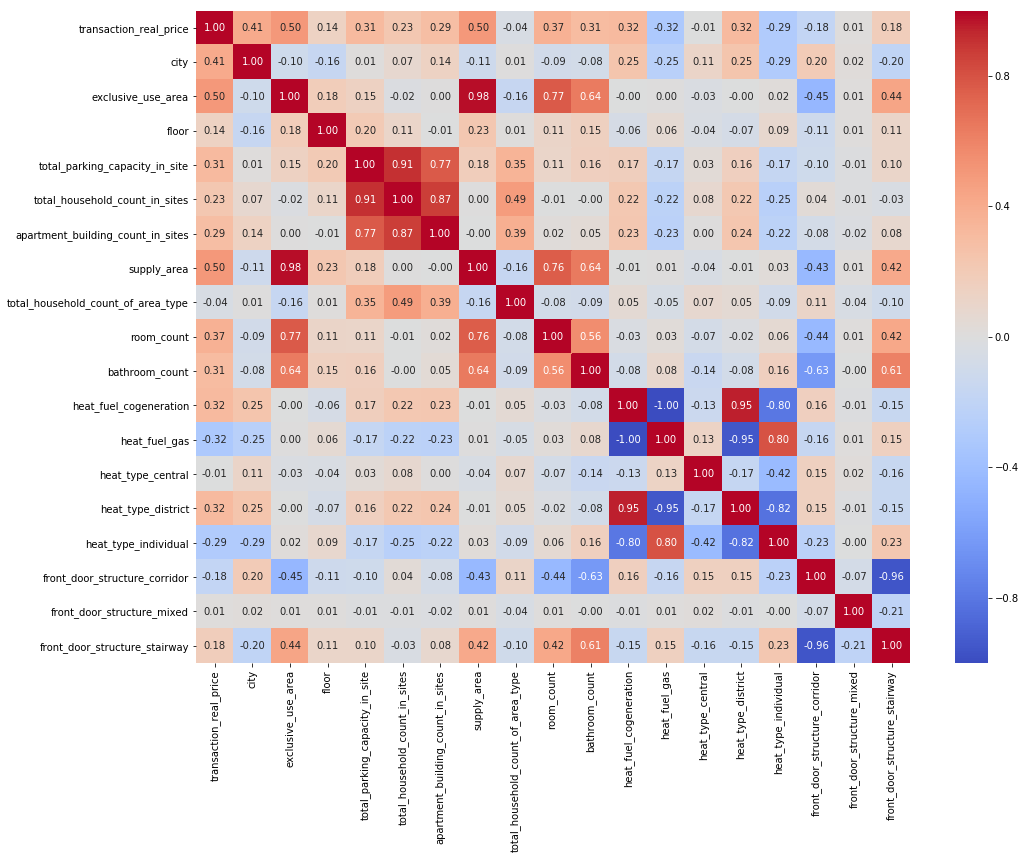

In [32]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

## Selected the most relevent 9 variables

In [51]:
col_n = ['transaction_real_price', 'city', 'exclusive_use_area',
         'total_parking_capacity_in_site', 
         'apartment_building_count_in_sites', 
         'supply_area',
         'room_count', 
         'bathroom_count',
         'heat_type_individual']

df_plot = pd.DataFrame(df,columns = col_n)
df_plot.head()

,transaction_real_price,city,exclusive_use_area,total_parking_capacity_in_site,apartment_building_count_in_sites,supply_area,room_count,bathroom_count,heat_type_individual
0,724000000,1,84.55,500.0,5,105.26,3.0,1.0,0
1,390000000,1,82.49,131.0,1,110.63,3.0,2.0,1
2,341000000,1,84.87,2990.0,22,107.62,3.0,2.0,1
3,68000000,0,40.66,1000.0,18,46.28,1.0,1.0,1
4,83000000,0,32.58,217.0,1,46.28,1.0,1.0,1


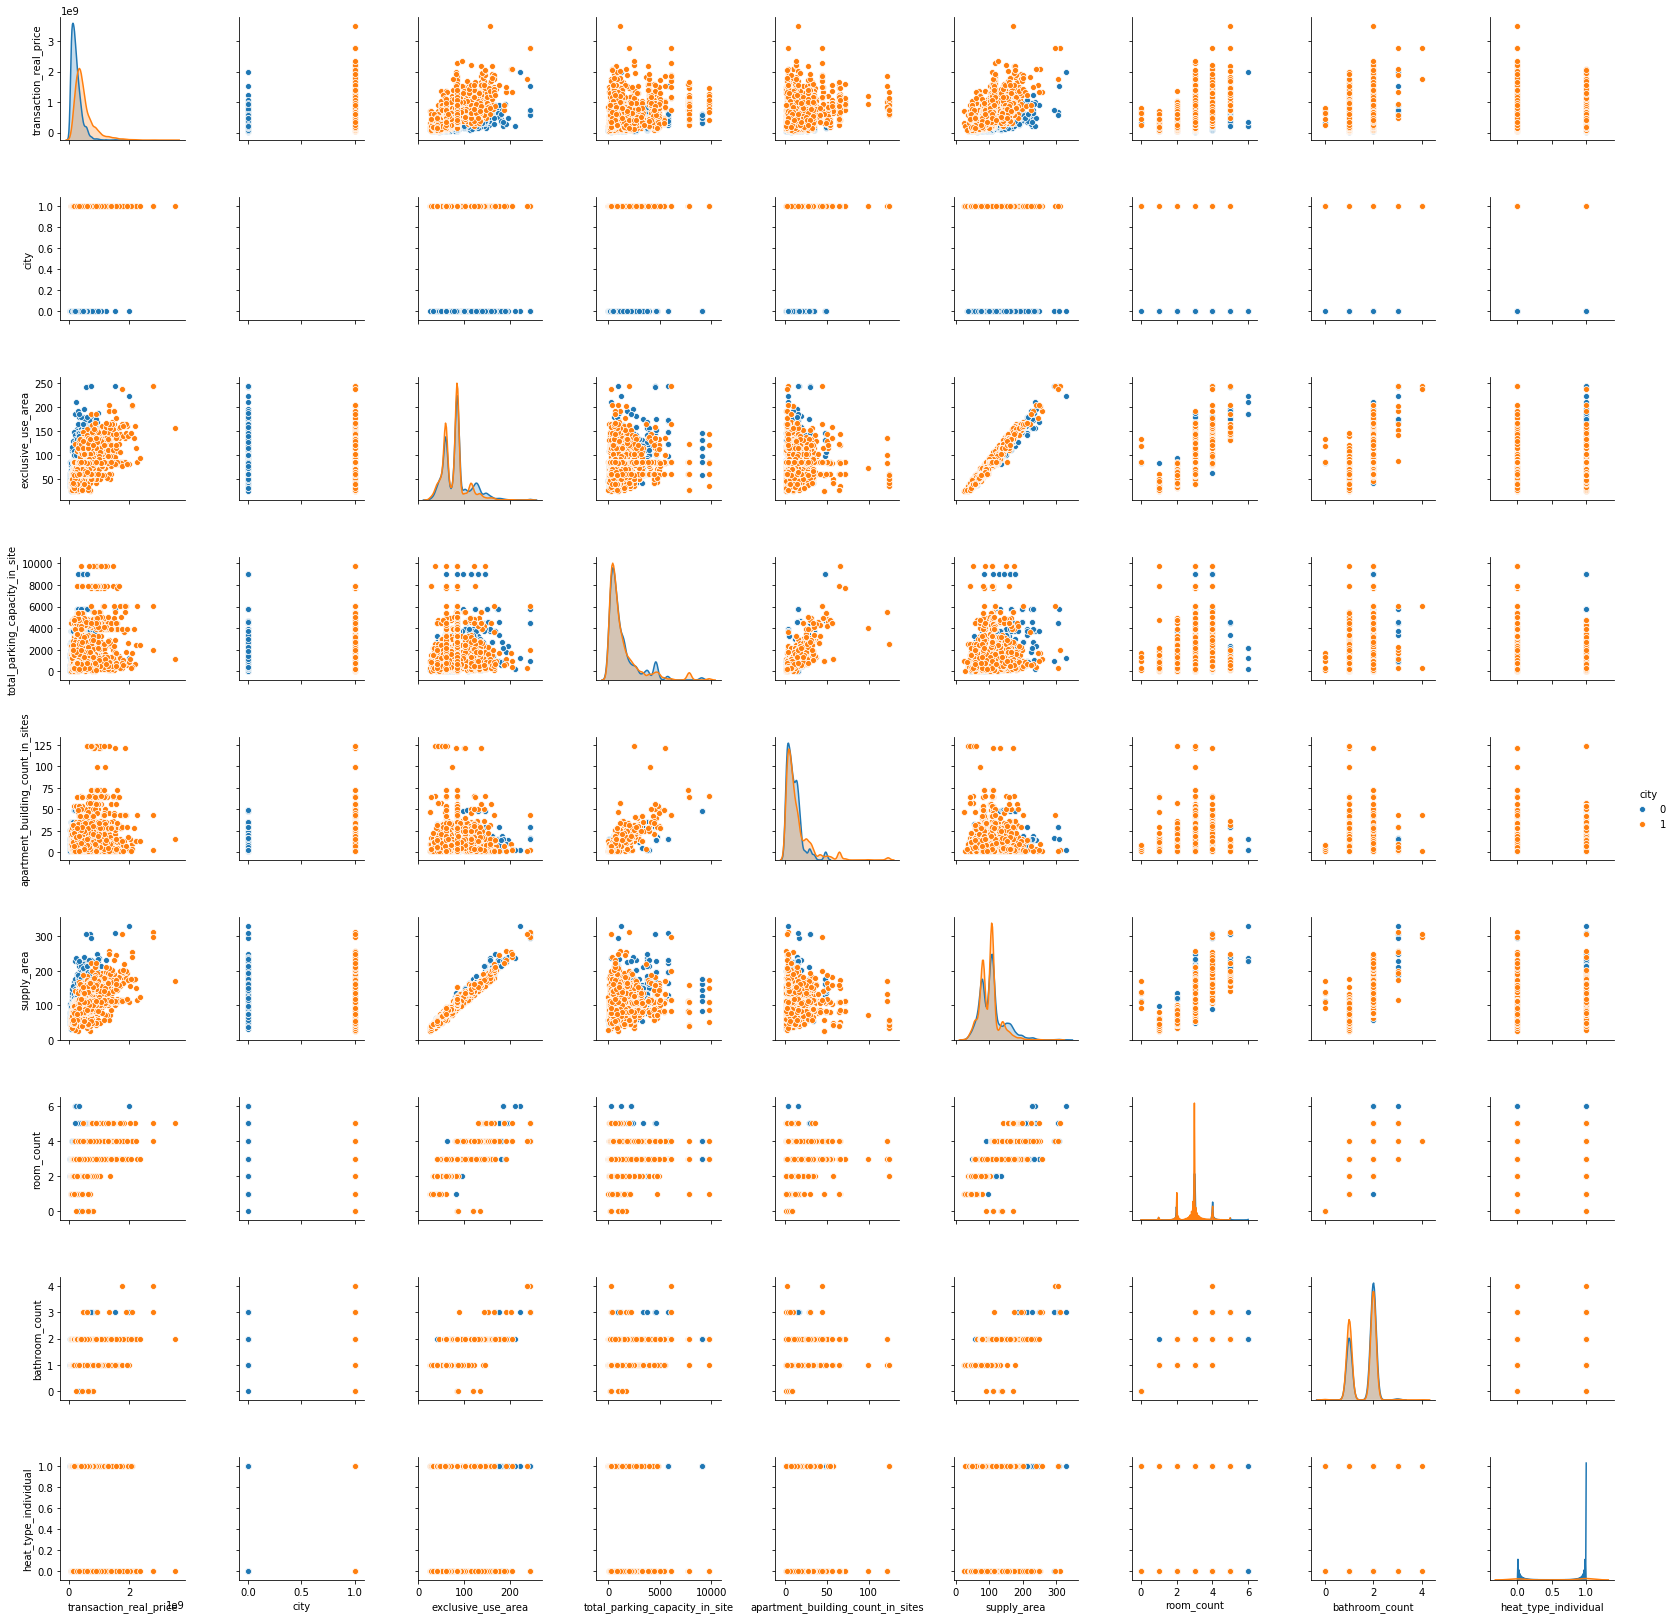

In [52]:
# Quick plot of the data using seaborn
sns.pairplot(df_plot, hue="city")
plt.show()

In [53]:
df_plot.describe()

,transaction_real_price,city,exclusive_use_area,total_parking_capacity_in_site,apartment_building_count_in_sites,supply_area,room_count,bathroom_count,heat_type_individual
count,4.470000e+03,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000,4470.000000
mean,4.088925e+08,0.625727,80.436253,1382.867114,13.194855,103.463678,2.966890,1.609620,0.675391
std,3.096397e+08,0.483989,27.768660,1545.972430,14.453646,32.740891,0.655647,0.501014,0.468281
min,3.500000e+07,0.000000,24.247500,0.000000,1.000000,25.420000,0.000000,0.000000,0.000000
25%,2.050000e+08,0.000000,59.890000,428.000000,4.000000,80.720000,3.000000,1.000000,0.000000
50%,3.350000e+08,1.000000,84.640000,817.500000,9.000000,104.650000,3.000000,2.000000,1.000000
75%,5.090000e+08,1.000000,84.980000,1650.000000,16.000000,112.407500,3.000000,2.000000,1.000000
max,3.500000e+09,1.000000,244.864700,9766.000000,124.000000,329.390000,6.000000,4.000000,1.000000


## Check the Multi-colinearity of the variable 

Using VIF

In [54]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y, X = dmatrices( 'transaction_real_price ~ city + exclusive_use_area + total_parking_capacity_in_site + apartment_building_count_in_sites + supply_area + room_count + bathroom_count + heat_type_individual', 
                 data = df_plot, return_type= 'dataframe')

vif = pd.DataFrame()
vif[ "VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif[ "features"] = X.columns
vif

,VIF Factor,features
0,32.687817,Intercept
1,1.134559,city
2,35.330823,exclusive_use_area
3,3.012712,total_parking_capacity_in_site
4,2.878299,apartment_building_count_in_sites
5,35.307591,supply_area
6,2.542248,room_count
7,1.818960,bathroom_count
8,1.198613,heat_type_individual


In [55]:
## Since the value of VIF for supply_area and exclusive_use_area is much bigger than 10
## Therefore, these two might have Multi-colinearity 
## Delete supply_area because exclusive_use_area relate to transaction_real_price more
df_plot = df_plot.drop('supply_area', 1)

## Output the dataset for modeling 

In [57]:
df_plot.to_csv("df_plot.csv",sep=",",index=False,header=True)

In [74]:
df_plot = pd.read_csv('df_plot.csv') 
x = df_plot[['city', 'exclusive_use_area',
             'total_parking_capacity_in_site', 'apartment_building_count_in_sites',
             'room_count', 'bathroom_count',
             'heat_type_individual'
            ]]

y = df_plot[["transaction_real_price"]]

## Linear Model

In [75]:
## Linear Model 1
predictors = x[["city", 
             'exclusive_use_area', 
             'room_count',
             'bathroom_count',
                'heat_type_individual'
             ]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(predictors, y)

# Print the coefficients
print ("results.intercept_ = ", results.intercept_,",  results.coef_ = ",results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
# 
X2 = sm.add_constant(predictors)
model = sm.OLS(y, X2)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

results.intercept_ =  [-1.76626091e+08] ,  results.coef_ =  [[ 2.63459052e+08  5.86473177e+06 -2.61513488e+06  2.43046231e+07
  -1.22054048e+08]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     transaction_real_price   R-squared:                       0.496
Model:                                OLS   Adj. R-squared:                  0.495
Method:                     Least Squares   F-statistic:                     877.5
Date:                    Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                            01:00:19   Log-Likelihood:                -92205.
No. Observations:                    4470   AIC:                         1.844e+05
Df Residuals:                        4464   BIC:                         1.845e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.766e+08   1.77e+07     -9.958      0.000   -2.11e+08   -1.42e+08
city                  2.635e+08   7.16e+06     36.810      0.000    2.49e+08    2.77e+08
exclusive_use_area    5.865e+06   2.05e+05     28.542      0.000    5.46e+06    6.27e+06
room_count           -2.615e+06   7.99e+06     -0.327      0.743   -1.83e+07     1.3e+07
bathroom_count         2.43e+07   8.77e+06      2.772      0.006    7.12e+06    4.15e+07
heat_type_individual -1.221e+08    7.5e+06    -16.267      0.000   -1.37e+08   -1.07e+08
==============================================================================
Omnibus:                     2124.883   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20961.646
Skew:                           2.029   Prob(JB):                         0.00
Kurtosis:                      12.802   Cond. No.                         488.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
## Linear Model 1 Cross Validation

from sklearn.model_selection import cross_val_score
cv = linear_model.LinearRegression()
cv = cv.fit(predictors, y)
 
scores = cross_val_score(cv, predictors, y, cv=10)

print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.48110031 0.56102391 0.50496113 0.54361271 0.48284705 0.49609803
 0.47883089 0.41139932 0.45860831 0.51905038]
Accuracy: 0.49 (+/- 0.08)


In [77]:
## Linear Model 2

predictors = x[['city', 
             'total_parking_capacity_in_site', 
            'apartment_building_count_in_sites',
             'room_count', 'bathroom_count', 
            ]]


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(predictors, y)

# Print the coefficients
print ("results.intercept_ = ", results.intercept_,",  results.coef_ = ",results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
# 
X2 = sm.add_constant(predictors)
model = sm.OLS(y, X2)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

results.intercept_ =  [-4.163325e+08] ,  results.coef_ =  [[2.79427415e+08 4.17136804e+04 1.26085409e+06 1.49405420e+08
  8.24971097e+07]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     transaction_real_price   R-squared:                       0.421
Model:                                OLS   Adj. R-squared:                  0.421
Method:                     Least Squares   F-statistic:                     649.9
Date:                    Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                            01:00:20   Log-Likelihood:                -92512.
No. Observations:                    4470   AIC:                         1.850e+05
Df Residuals:                        4464   BIC:                         1.851e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -4.163e+08   1.78e+07    -23.360      0.000   -4.51e+08   -3.81e+08
city                               2.794e+08   7.45e+06     37.494      0.000    2.65e+08    2.94e+08
total_parking_capacity_in_site     4.171e+04   3666.716     11.376      0.000    3.45e+04    4.89e+04
apartment_building_count_in_sites  1.261e+06   3.91e+05      3.223      0.001    4.94e+05    2.03e+06
room_count                         1.494e+08   6.49e+06     23.031      0.000    1.37e+08    1.62e+08
bathroom_count                      8.25e+07   8.56e+06      9.633      0.000    6.57e+07    9.93e+07
==============================================================================
Omnibus:                     2509.461   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30543.824
Skew:                           2.441   Prob(JB):                         0.00
Kurtosis:                      14.839   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
## Linear Model 2 Cross Validation

from sklearn.model_selection import cross_val_score
cv = linear_model.LinearRegression()
cv = cv.fit(predictors, y)
 
scores = cross_val_score(cv, predictors, y, cv=10)

print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.42198475 0.45619034 0.43379414 0.4002947  0.41431357 0.47078464
 0.42411042 0.40123439 0.38528826 0.39170071]
Accuracy: 0.42 (+/- 0.05)


In [113]:
## Linear Model 3

predictors = x[['city', 'exclusive_use_area',
             'total_parking_capacity_in_site','bathroom_count',
                'heat_type_individual', ]]


# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(predictors, y)

# Print the coefficients
print ("results.intercept_ = ", results.intercept_,",  results.coef_ = ",results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
# 
X2 = sm.add_constant(predictors)
model = sm.OLS(y, X2)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

results.intercept_ =  -217923184.92029083 ,  results.coef_ =  [ 2.67364981e+08  5.71900717e+06  4.17795890e+04  3.22028614e+06
 -9.39549159e+07]


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     transaction_real_price   R-squared:                       0.536
Model:                                OLS   Adj. R-squared:                  0.536
Method:                     Least Squares   F-statistic:                     1033.
Date:                    Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                            01:47:11   Log-Likelihood:                -92017.
No. Observations:                    4470   AIC:                         1.840e+05
Df Residuals:                        4464   BIC:                         1.841e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -2.179e+08   1.35e+07    -16.185      0.000   -2.44e+08   -1.92e+08
city                            2.674e+08   6.87e+06     38.942      0.000    2.54e+08    2.81e+08
exclusive_use_area              5.719e+06    1.5e+05     38.230      0.000    5.43e+06    6.01e+06
total_parking_capacity_in_site  4.178e+04   2112.683     19.776      0.000    3.76e+04    4.59e+04
bathroom_count                   3.22e+06   8.42e+06      0.383      0.702   -1.33e+07    1.97e+07
heat_type_individual           -9.395e+07   7.33e+06    -12.825      0.000   -1.08e+08   -7.96e+07
==============================================================================
Omnibus:                     2174.484   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25088.318
Skew:                           2.033   Prob(JB):                         0.00
Kurtosis:                      13.870   Cond. No.                     9.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
## Linear Model 3 Cross Validation

from sklearn.model_selection import cross_val_score
cv = linear_model.LinearRegression()
cv = cv.fit(predictors, y)
 
scores = cross_val_score(cv, predictors, y, cv=10)

print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.52979823 0.58483973 0.5397069  0.56141707 0.53265647 0.55390484
 0.50872231 0.4803476  0.49803607 0.55278998]
Accuracy: 0.53 (+/- 0.06)


#### This Linear Model is the most accurate one I can get, but it only has 0.53 accuracy. 
 - So the transciton price is related to the following variable : 

   city, exclusive_use_area, total_parking_capacity_in_site, heat_type_individual, bathroom_count, 

 - The smaller the AIC and BIC, the better the explanatory power of the representative model(the less variables used, or the smaller the sum of squared errors).


## Regularization

In [102]:
predictors = ['city', 'exclusive_use_area',
             'total_parking_capacity_in_site',
                'heat_type_individual', 'heat_type_individual']

X = df_plot[predictors]  
y = df_plot['transaction_real_price']

if __name__ == "__main__":
    model = Lasso() 
    alpha_can = np.logspace(-3, 2, 10)
    print ('alpha_can = ', alpha_can)
    lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5) 
    lasso_model.fit(x, y)
    print ('lasso_model.best_params：', lasso_model.best_params_)  
    
    y_hat = lasso_model.predict(x)
    print ('lasso_model.score = ',lasso_model.score(x, y))


alpha_can =  [  0.001        0.00359381   0.0129155    0.04641589   0.16681005
   0.59948425   2.15443469   7.74263683  27.82559402 100.        ]
lasso_model.best_params： {'alpha': 100.0}
lasso_model.score =  0.5406052150082488


#### Regularization
After regularization, its score increase to 0.54 compare to the score before regularization. So we can tell regularization must reduce network errors.

## Stepwise Regression

In [110]:
# import the relevant module
import statsmodels.api as sm

# separate our my predictor variables (X) from my outcome variable y

predictors = ['city', 'exclusive_use_area',
       'total_parking_capacity_in_site', 'apartment_building_count_in_sites',
       'room_count', 'bathroom_count', 'heat_type_individual']

X = df_plot[predictors]  
y = df_plot['transaction_real_price']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)  
X.ix[:10, :11]

,const,city,exclusive_use_area,total_parking_capacity_in_site,apartment_building_count_in_sites,room_count,bathroom_count,heat_type_individual
0,1.0,1,84.5500,500.0,5,3.0,1.0,0
1,1.0,1,82.4900,131.0,1,3.0,2.0,1
2,1.0,1,84.8700,2990.0,22,3.0,2.0,1
3,1.0,0,40.6600,1000.0,18,1.0,1.0,1
4,1.0,0,32.5800,217.0,1,1.0,1.0,1
5,1.0,0,119.0600,350.0,2,4.0,2.0,1
6,1.0,0,59.7900,560.0,6,2.0,1.0,1
7,1.0,0,56.3450,952.0,10,3.0,1.0,0
8,1.0,1,84.9600,1459.0,13,3.0,2.0,1
9,1.0,1,84.9300,600.0,8,3.0,1.0,0


In [111]:
# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(y, X).fit()

# (3) evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     transaction_real_price   R-squared:                       0.541
Model:                                OLS   Adj. R-squared:                  0.540
Method:                     Least Squares   F-statistic:                     750.1
Date:                    Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                            01:37:55   Log-Likelihood:                -91996.
No. Observations:                    4470   AIC:                         1.840e+05
Df Residuals:                        4462   BIC:                         1.841e+05
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -2.276e+08   1.71e+07    -13.286      0.000   -2.61e+08   -1.94e+08
city                               2.606e+08   6.91e+06     37.699      0.000    2.47e+08    2.74e+08
exclusive_use_area                 5.906e+06   1.98e+05     29.810      0.000    5.52e+06    6.29e+06
total_parking_capacity_in_site      2.53e+04   3303.008      7.660      0.000    1.88e+04    3.18e+04
apartment_building_count_in_sites  2.283e+06   3.53e+05      6.470      0.000    1.59e+06    2.97e+06
room_count                         -3.93e+06   7.64e+06     -0.514      0.607   -1.89e+07     1.1e+07
bathroom_count                      3.41e+06   8.44e+06      0.404      0.686   -1.31e+07    1.99e+07
heat_type_individual              -8.969e+07   7.33e+06    -12.234      0.000   -1.04e+08   -7.53e+07
==============================================================================
Omnibus:                     2190.315   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26081.661
Skew:                           2.041   Prob(JB):                         0.00
Kurtosis:                      14.107   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
# (3) cont. - Identify the predictor with the greatest p-value and assess if its > our selected alpha.
#             based off the table it is clear that room_count & bathroom_count has the greatest p-value 
#             and that it is greater than our alpha of 0.05

# (4) - Use pandas drop function to remove this column from X
X = X.drop('room_count', axis=1)
X = X.drop('bathroom_count', axis=1)

# (5) Fit the model 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     transaction_real_price   R-squared:                       0.541
Model:                                OLS   Adj. R-squared:                  0.540
Method:                     Least Squares   F-statistic:                     1050.
Date:                    Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                            01:37:56   Log-Likelihood:                -91996.
No. Observations:                    4470   AIC:                         1.840e+05
Df Residuals:                        4464   BIC:                         1.840e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -2.315e+08   1.29e+07    -17.918      0.000   -2.57e+08   -2.06e+08
city                               2.608e+08   6.91e+06     37.762      0.000    2.47e+08    2.74e+08
exclusive_use_area                 5.872e+06   1.16e+05     50.434      0.000    5.64e+06     6.1e+06
total_parking_capacity_in_site     2.548e+04   3287.572      7.752      0.000     1.9e+04    3.19e+04
apartment_building_count_in_sites  2.272e+06   3.52e+05      6.454      0.000    1.58e+06    2.96e+06
heat_type_individual              -8.934e+07   7.15e+06    -12.491      0.000   -1.03e+08   -7.53e+07
==============================================================================
Omnibus:                     2184.468   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25900.774
Skew:                           2.036   Prob(JB):                         0.00
Kurtosis:                      14.067   Cond. No.                     9.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Accounding to the Stepwise Regression
The following variable is most related to the transicition price: <br>
    city, exclusive_use_area, total_parking_capacity_in_site, apartment_building_count_in_sites, heat_type_individual

And its R-squared even increase to 0.541.


## Logistic model

Separate the target value (transaction_real_price) into binary according the median of the data, everything bigger than median turns into "1" and those who smaller than median into "0", since the logistic model can only predict the binary data

In [86]:
median_price = df_plot['transaction_real_price'].mean()
print(median_price)

408892534.6756152


In [87]:
df_plot['transaction_real_price_highlow'] = df_plot['transaction_real_price'].apply(lambda x : 1 if x > median_price else 0)

In [88]:
df_plot.head()

,transaction_real_price,city,exclusive_use_area,total_parking_capacity_in_site,apartment_building_count_in_sites,room_count,bathroom_count,heat_type_individual,transaction_real_price_highlow
0,724000000,1,84.55,500.0,5,3.0,1.0,0,1
1,390000000,1,82.49,131.0,1,3.0,2.0,1,0
2,341000000,1,84.87,2990.0,22,3.0,2.0,1,0
3,68000000,0,40.66,1000.0,18,1.0,1.0,1,0
4,83000000,0,32.58,217.0,1,1.0,1.0,1,0


In [92]:
## Logistic Model 1

y = df_plot[['transaction_real_price_highlow']]
predictors = df_plot[['exclusive_use_area',
       'total_parking_capacity_in_site', 'apartment_building_count_in_sites',
       'room_count', 'bathroom_count', 'heat_type_individual']]

logit_model=sm.Logit(y, predictors)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.564728
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                Logit                          Pseudo R-squared: 0.144      
Dependent Variable:   transaction_real_price_highlow AIC:              5060.6660  
Date:                 2019-02-26 01:01               BIC:              5099.0968  
No. Observations:     4470                           Log-Likelihood:   -2524.3    
Df Model:             5                              LL-Null:          -2948.2    
Df Residuals:         4464                           LLR p-value:      5.2607e-181
Converged:            1.0000                         Scale:            1.0000     
No. Iterations:       6.0000                                                      
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
exclusive_use_area                 0.0465   0.0026  17.8540 0.0000  0.0414  0.0516
total_parking_capacity_in_site     0.0001   0.0000   1.6305 0.1030 -0.0000  0.0001
apartment_building_count_in_sites  0.0176   0.0037   4.7189 0.0000  0.0103  0.0249
room_count                        -1.3788   0.0767 -17.9824 0.0000 -1.5291 -1.2285
bathroom_count                     0.2358   0.0939   2.5102 0.0121  0.0517  0.4199
heat_type_individual              -1.2207   0.0747 -16.3428 0.0000 -1.3671 -1.0743
==================================================================================

"""

In [93]:
## Logistic Model 1 Cross Validation

from sklearn.model_selection import cross_val_score
cv = linear_model.LogisticRegression()
cv = cv.fit(predictors, y)
 
scores = cross_val_score(cv, predictors, y, cv=10)

print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.73883929 0.74272931 0.74720358 0.73154362 0.71812081 0.73154362
 0.72035794 0.74049217 0.75838926 0.75336323]
Accuracy: 0.74 (+/- 0.02)


In [94]:
## Logistic Model 2 

y = df_plot[['transaction_real_price_highlow']]
predictors = df_plot[['exclusive_use_area',
       'total_parking_capacity_in_site', 
                'apartment_building_count_in_sites',
                   'room_count',   
        'heat_type_individual']]

logit_model=sm.Logit(y, predictors)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.565434
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
==================================================================================
Model:                Logit                          Pseudo R-squared: 0.143      
Dependent Variable:   transaction_real_price_highlow AIC:              5064.9831  
Date:                 2019-02-26 01:01               BIC:              5097.0088  
No. Observations:     4470                           Log-Likelihood:   -2527.5    
Df Model:             4                              LL-Null:          -2948.2    
Df Residuals:         4465                           LLR p-value:      7.9257e-181
Converged:            1.0000                         Scale:            1.0000     
No. Iterations:       6.0000                                                      
----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------
exclusive_use_area                 0.0485   0.0025  19.3905 0.0000  0.0436  0.0534
total_parking_capacity_in_site     0.0001   0.0000   1.7747 0.0760 -0.0000  0.0001
apartment_building_count_in_sites  0.0179   0.0038   4.7828 0.0000  0.0106  0.0253
room_count                        -1.3196   0.0725 -18.2100 0.0000 -1.4616 -1.1776
heat_type_individual              -1.1660   0.0711 -16.3941 0.0000 -1.3054 -1.0266
==================================================================================

"""

In [95]:
## Logistic Model 2 Cross Validation

from sklearn.model_selection import cross_val_score
cv = linear_model.LogisticRegression()
cv = cv.fit(predictors, y)
 
scores = cross_val_score(cv, predictors, y, cv=10)

print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.75       0.73825503 0.74049217 0.72483221 0.73378076 0.72259508
 0.73154362 0.73825503 0.74272931 0.75560538]
Accuracy: 0.74 (+/- 0.02)


In [98]:
## Logistic Model 3

y = df_plot[['transaction_real_price_highlow']]
predictors = df_plot[['city','exclusive_use_area',
       'total_parking_capacity_in_site', 
       'bathroom_count','heat_type_individual']]

logit_model=sm.Logit(y, predictors)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.595555
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:              Logit                          Pseudo R-squared: 0.097      
Dependent Variable: transaction_real_price_highlow AIC:              5334.2614  
Date:               2019-02-26 01:02               BIC:              5366.2871  
No. Observations:   4470                           Log-Likelihood:   -2662.1    
Df Model:           4                              LL-Null:          -2948.2    
Df Residuals:       4465                           LLR p-value:      1.6035e-122
Converged:          1.0000                         Scale:            1.0000     
No. Iterations:     5.0000                                                      
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
city                             0.6872   0.0631  10.8873 0.0000  0.5635  0.8109
exclusive_use_area               0.0118   0.0015   7.7856 0.0000  0.0088  0.0147
total_parking_capacity_in_site   0.0001   0.0000   5.9688 0.0000  0.0001  0.0002
bathroom_count                  -0.6045   0.0845  -7.1551 0.0000 -0.7701 -0.4389
heat_type_individual            -1.3403   0.0689 -19.4645 0.0000 -1.4753 -1.2054
================================================================================

"""

In [99]:
## Logistic Model 3 Cross Validation

from sklearn.model_selection import cross_val_score
cv = linear_model.LogisticRegression()
cv = cv.fit(predictors, y)
 
scores = cross_val_score(cv, predictors, y, cv=10)

print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.79241071 0.8344519  0.81655481 0.82997763 0.79642058 0.80313199
 0.7852349  0.79418345 0.81655481 0.81165919]
Accuracy: 0.81 (+/- 0.03)


#### This Logistic Model is the most accurate one I can get, but it has 0.81 accuracy.
 - So the transciton price is related to the following variable :
   city, exclusive_use_area, total_parking_capacity_in_site, 'bathroom_count', heat_type_individual
 - The probability of getting the dependent variable will be 0.81

## Interaction effects

In [123]:
df_plot['use_room'] = df_plot['exclusive_use_area']*df_plot['room_count']

df_plot['room_bathroom'] = df_plot['room_count']*df_plot['bathroom_count']

df_plot.head()

,transaction_real_price,city,exclusive_use_area,total_parking_capacity_in_site,apartment_building_count_in_sites,room_count,bathroom_count,heat_type_individual,transaction_real_price_highlow,use_room,room_bathroom
0,724000000,1,84.55,500.0,5,3.0,1.0,0,1,253.65,3.0
1,390000000,1,82.49,131.0,1,3.0,2.0,1,0,247.47,6.0
2,341000000,1,84.87,2990.0,22,3.0,2.0,1,0,254.61,6.0
3,68000000,0,40.66,1000.0,18,1.0,1.0,1,0,40.66,1.0
4,83000000,0,32.58,217.0,1,1.0,1.0,1,0,32.58,1.0


In [125]:
## from Linear Model 1
predictors = df_plot[["city", 
             'exclusive_use_area', 
             'room_count',
             'bathroom_count',
             'heat_type_individual',
             'use_room',
             'room_bathroom'
            ]]


y = df_plot[["transaction_real_price"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(predictors, y)

# Print the coefficients
print ("results.intercept_ = ", results.intercept_,",  results.coef_ = ",results.coef_)

# import statsmodels.api as sm
# Note the swap of X and y
# 
X2 = sm.add_constant(predictors)
model = sm.OLS(y, X2)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

results.intercept_ =  [-3.62144535e+08] ,  results.coef_ =  [[ 2.63928352e+08  5.88668209e+06  5.37480867e+07  1.89332036e+08
  -1.23352803e+08  1.77940684e+05 -5.91898288e+07]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     transaction_real_price   R-squared:                       0.498
Model:                                OLS   Adj. R-squared:                  0.497
Method:                     Least Squares   F-statistic:                     632.1
Date:                    Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                            02:34:10   Log-Likelihood:                -92195.
No. Observations:                    4470   AIC:                         1.844e+05
Df Residuals:                        4462   BIC:                         1.845e+05
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.621e+08   4.69e+07     -7.723      0.000   -4.54e+08    -2.7e+08
city                  2.639e+08   7.15e+06     36.904      0.000     2.5e+08    2.78e+08
exclusive_use_area    5.887e+06   5.74e+05     10.253      0.000    4.76e+06    7.01e+06
room_count            5.375e+07   1.55e+07      3.476      0.001    2.34e+07    8.41e+07
bathroom_count        1.893e+08   4.38e+07      4.326      0.000    1.04e+08    2.75e+08
heat_type_individual -1.234e+08   7.51e+06    -16.426      0.000   -1.38e+08   -1.09e+08
use_room              1.779e+05   1.66e+05      1.069      0.285   -1.48e+05    5.04e+05
room_bathroom        -5.919e+07   1.49e+07     -3.968      0.000   -8.84e+07   -2.99e+07
==============================================================================
Omnibus:                     2150.168   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21764.436
Skew:                           2.051   Prob(JB):                         0.00
Kurtosis:                      13.002   Cond. No.                     5.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interaction effects
From the product that I create, the use_room comparing to either exclusive_use_area or room_count, its amount of coef is way too low then their value separately. And the room_bathroom has the same effects, so we can tell there are significant synergy (interaction effect) in both of my tested product terms.

## Conclusion

Accounding to all the model I genernate no matter is linear or logistic, the variable will effect the transiciton price are following <br>
city, exclusive_use_area, total_parking_capacity_in_site, apartment_building_count_in_sites, heat_type_individual<br>
And that make sense, price will be different depends on the area, which is city in our case. The second things will effect must be the space, that's why these three variables (exclusive_use_area, total_parking_capacity_in_site, apartment_building_count_in_sites) makes sence. Another factor will effects the price is heat_type.
Therefore, all the variables that will effect the price is reasonable.

## Contributions 

- By own: 30%
- By external source:70%

##  Citations
https://planspace.org/20150423-forward_selection_with_statsmodels/

https://my.oschina.net/u/567648/blog/1635706

https://zhuanlan.zhihu.com/p/35977229

https://www.jianshu.com/p/bbfbdedc3c1c

https://zhuanlan.zhihu.com/p/38579881

https://blog.csdn.net/carlwu/article/details/80017560

https://python.freelycode.com/contribution/detail/487

https://zhuanlan.zhihu.com/p/56793236

http://www.sohu.com/a/201764621_654419

https://www.ctolib.com/topics-128750.html

https://www.jianshu.com/p/ef1b27b8aee0

##  License

MIT License

Copyright (c) 2019 Hsiang-Hua Chen

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

